In [1]:
data = pd.read_csv("Data set/GreenCities-Data.csv")
data

,city,People,Planet,Profit,Overall,Country,Continent
0,Zurich,27,1,5,1,Switzerland,Europe
1,Singapore,48,12,1,2,Singapore,Asia
2,Stockholm,14,2,10,3,Sweden,Europe
3,Vienna,4,4,14,4,Austria,Europe
4,London,37,9,3,5,U.K.,Europe
...,...,...,...,...,...,...,...
95,Manila,94,86,91,96,Philippines,Asia
96,New Delhi,87,90,96,97,India,Asia
97,Nairobi,98,83,90,98,Kenya,Africa
98,Cairo,92,93,98,99,Egypt,Africa


            city  People  Planet  Profit  Overall      Country Continent
1      Singapore      48      12       1        2    Singapore      Asia
6          Seoul       1      26      18        7  South Korea      Asia
15     Hong Kong      81      29       2       16        China      Asia
40         Macau      69      51      15       41        China      Asia
44         Tokyo      44      50      28       45        Japan      Asia
47        Taipei      32      71      27       48       Taiwan      Asia
54  Kuala Lumpur      53      84      19       55     Malaysia      Asia
63      Shenzhen      73      66      56       64        China      Asia
66       Bangkok      64      79      53       67     Thailand      Asia
72       Beijing      45      97      67       73        China      Asia
73      Shanghai      43      91      77       74        China      Asia
77     Guangzhou      65      80      78       78        China      Asia
84       Tianjin      68      77      87       85  

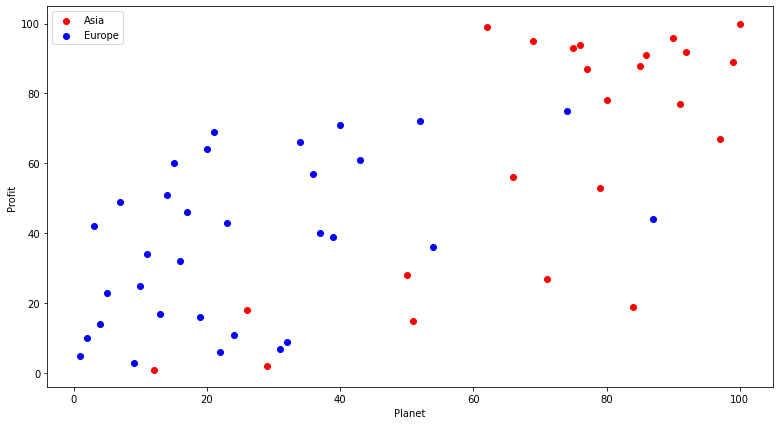

In [4]:
df = pd.DataFrame(data)

asia_group = df.loc[df['Continent'] == 'Asia']
europe_group = df.loc[df['Continent'] == 'Europe']

df = pd.concat([asia_group, europe_group])
grouped = df.groupby('Continent')

print(df)

continent_color = {"Asia": 'red', 'Europe': 'blue'}

plt.figure(figsize=(13, 7))

for idx, item in grouped:
    if idx == 'Asia' or idx == 'Europe':
        plt.scatter('Planet', 'Profit', data = item, label = idx, c = continent_color[idx])

plt.xlabel('Planet')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [5]:
# sigmoid function
def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [12]:
m = len(df)  # number of data

w = pd.Series([np.random.rand(),np.random.rand(),np.random.rand()]) 

echo = int(1e6)
learning_rate = 0.05

print(w)
print(m)

0    0.872248
1    0.559272
2    0.892860
dtype: float64
55


In [13]:
# gradient
for iter in range(echo):
    temp = np.array([[1] * m, df.Planet, df.Profit])
    w_dot = w.dot(temp)
    
    # cost function
    h = np.array(sigmoid(w_dot))
    
    y = [1 if x == 'Asia' else 0 for x in df.Continent]
    
    h -= y
    
    delta_w0 = learning_rate * sum(h)
    delta_w1 = learning_rate * h.dot(df.Planet)
    delta_w2 = learning_rate * h.dot(df.Profit)
    
    # update w0, w1, w2
    w[0] = w[0] - delta_w0 / m
    w[1] = w[1] - delta_w1 / m
    w[2] = w[2] - delta_w2 / m
    
print(w)

0   -39.106905
1     1.022163
2    -0.377866
dtype: float64


In [14]:
x_range = np.linspace(min(df.Planet), max(df.Planet))

x_range

array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.36734694,  39.3877551 ,
        41.40816327,  43.42857143,  45.44897959,  47.46938776,
        49.48979592,  51.51020408,  53.53061224,  55.55102041,
        57.57142857,  59.59183673,  61.6122449 ,  63.63265306,
        65.65306122,  67.67346939,  69.69387755,  71.71428571,
        73.73469388,  75.75510204,  77.7755102 ,  79.79591837,
        81.81632653,  83.83673469,  85.85714286,  87.87755102,
        89.89795918,  91.91836735,  93.93877551,  95.95918367,
        97.97959184, 100.        ])

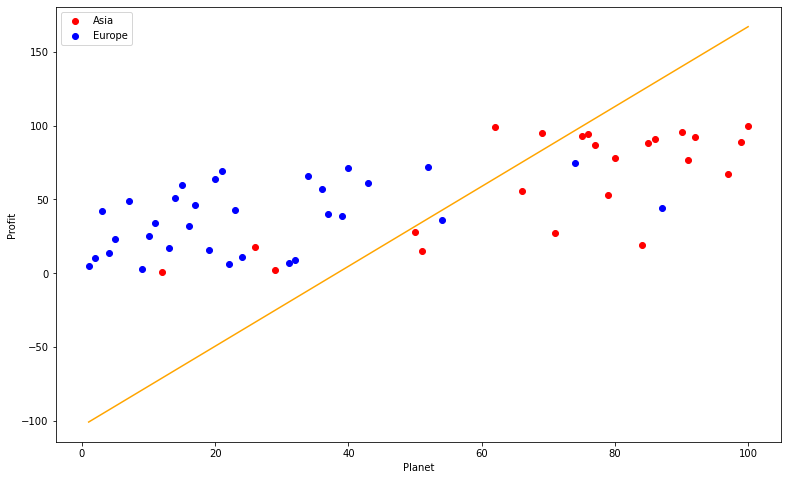

In [15]:
plt.figure(figsize=(13, 8))
continet_color = {"Asia": 'red', "Europe": "blue"}

for idx, item in grouped:
    if idx == 'Asia' or idx == 'Europe':
        plt.scatter('Planet', 'Profit', data = item, label = idx, c = continet_color[idx])
        
x_range = np.linspace(min(df.Planet), max(df.Planet))
y_range = -(w[0] + w[1]*x_range) / w[2]

plt.plot(x_range, y_range, color = 'orange')

plt.xlabel('Planet')
plt.ylabel('Profit')
plt.legend()
plt.show()